**Thinkful - 3.2.6 - Challenge - If a Tree Falls in the Forest...**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pydotplus
import graphviz
from sklearn import tree
from IPython.display import Image
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Replace the path with the correct path for your data.
y2015 = pd.read_csv('data/LoanStats3d.csv',skipinitialspace=True,header=1)

# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

# Drop other columns with many unique variables
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc', 'verification_status_joint',
           'policy_code'], 1,inplace=True)

# Create dataset for use in models
X = y2015.drop(['loan_status'], 1)
y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y.value_counts()

Current               287414
Fully Paid             87989
Charged Off            29178
Late (31-120 days)      9510
In Grace Period         4320
Late (16-30 days)       1888
Default                  796
Name: loan_status, dtype: int64

Model Time: 6.699082851409912 seconds
[ 0.90679395  0.82956947  0.95908432  0.9159602   0.93540727  0.92130135
  0.9425776   0.9036548   0.86387062  0.92970123]
Weighted Accuracy: 0.91 (+/- 0.07)
Cross Val Time: 47.20189714431763 seconds


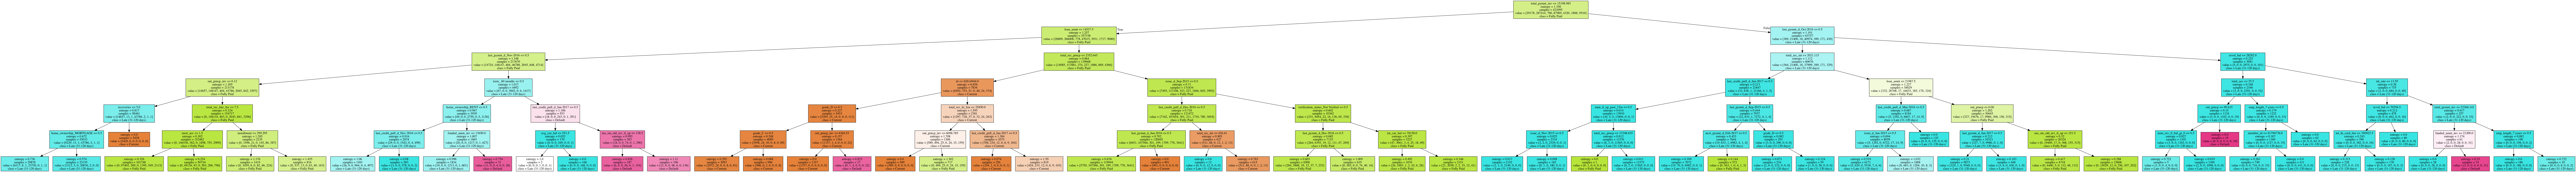

In [17]:
# Initialize and train our tree.
status_options = ['Current','Fully Paid','Charged Off','Late (31-120 days)','In Grace Period',
                 'Late (16-30 days)','Default']

start_time = time.time()

# Build Model
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',max_features=9,max_depth=6)
dtree = decision_tree.fit(X,y)
model_time = time.time()
a = (model_time - start_time)
print("Model Time: %s seconds" % a)

#Evaluate Model
#X_new = rfc_kbest.transform(X)
score = cross_val_score(dtree, X, y, cv=10)
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

cross_val_time = time.time()
b = (cross_val_time - model_time)
print("Cross Val Time: %s seconds" % b)

# Render our tree.
dot_data = tree.export_graphviz(decision_tree, out_file=None,feature_names=X.columns,
    class_names=status_options,filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [4]:
X = X.drop('pymnt_plan_n',1)

In [12]:
start_time = time.time()

# Build Model
rfc = ensemble.RandomForestClassifier()
kbest = SelectKBest(k=3).fit(X,y)
model_time = time.time()
a = (model_time - start_time)
print("Model Time: %s seconds" % a)

#Evaluate Model
X_new = kbest.transform(X)
score = cross_val_score(rfc, X_new, y, cv=10)
cross_val_time = time.time()
b = (cross_val_time - model_time)
print("Cross Val Time: %s seconds" % b)
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Model Time: 15.672481060028076 seconds
Cross Val Time: 157.0256631374359 seconds
[ 0.91094963  0.91109211  0.91149581  0.93236921  0.9080266   0.91747803
  0.92246313  0.91118288  0.90811504  0.91269653]
Weighted Accuracy: 0.91 (+/- 0.01)


In [5]:
start_time = time.time()

# Build Model
rfc = ensemble.RandomForestClassifier(n_estimators=20)
kbest = SelectKBest(k=3).fit(X,y)
model_time = time.time()
a = (model_time - start_time)
print("Model Time: %s seconds" % a)

#Evaluate Model
X_new = kbest.transform(X)
score = cross_val_score(rfc, X_new, y, cv=10)
cross_val_time = time.time()
b = (cross_val_time - model_time)
print("Cross Val Time: %s seconds" % b)
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Model Time: 19.266163110733032 seconds
Cross Val Time: 550.0227119922638 seconds
[ 0.91111586  0.91104462  0.91092589  0.93296288  0.90790786  0.91707433
  0.92272436  0.91177658  0.90711758  0.91141405]
Weighted Accuracy: 0.91 (+/- 0.02)


In [6]:
start_time = time.time()

# Build Model
rfc = ensemble.RandomForestClassifier(n_estimators=5)
kbest = SelectKBest(k=3).fit(X,y)
model_time = time.time()
a = (model_time - start_time)
print("Model Time: %s seconds" % a)

#Evaluate Model
X_new = kbest.transform(X)
score = cross_val_score(rfc, X_new, y, cv=10)
cross_val_time = time.time()
b = (cross_val_time - model_time)
print("Cross Val Time: %s seconds" % b)
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Model Time: 41.46573996543884 seconds
Cross Val Time: 128.81869220733643 seconds
[ 0.91130583  0.90961981  0.91075966  0.93263043  0.90717169  0.91593446
  0.92251063  0.91108789  0.90697509  0.9112478 ]
Weighted Accuracy: 0.91 (+/- 0.02)
